In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'C:/Users/Lenovo/Downloads/model3.csv'
data3 = pd.read_csv(file_path)

data3.head()

,"last_name, first_name",player_id,year,pa,slg_percent,isolated_power,babip,xiso,exit_velocity_avg,launch_angle_avg,...,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
0,"Cabrera, Miguel",408234,2021,526,0.386,0.130,0.305,0.186,91.4,10.0,...,95.613068,77.4,25.8,49.4,32.8,37.2,30.0,49.0,25.9,21.5
1,"Molina, Yadier",425877,2021,473,0.370,0.118,0.283,0.151,88.0,15.3,...,92.936144,78.3,24.0,57.1,43.4,34.3,22.3,42.6,29.1,21.7
2,"Cruz Jr., Nelson",443558,2021,584,0.497,0.232,0.286,0.248,92.9,11.8,...,97.364589,89.3,30.7,51.0,36.6,36.4,27.0,43.4,25.5,22.0
3,"Peralta, David",444482,2021,538,0.402,0.143,0.303,0.103,89.3,5.3,...,94.748490,77.6,21.3,46.5,31.2,40.8,28.0,54.9,15.6,23.2
4,"Escobar, Alcides",444876,2021,349,0.404,0.116,0.337,0.091,81.7,11.1,...,91.096948,75.0,21.6,52.1,31.1,38.2,30.7,45.3,20.6,28.8


In [2]:
missing_data_3 = data3.isnull().sum()
missing_data_3

last_name, first_name     0
player_id                 0
year                      0
pa                        0
slg_percent               0
isolated_power            0
babip                     0
xiso                      0
exit_velocity_avg         0
launch_angle_avg          0
sweet_spot_percent        0
barrel_batted_rate        0
hard_hit_percent          0
avg_best_speed            0
avg_hyper_speed           0
meatball_swing_percent    0
whiff_percent             0
swing_percent             0
pull_percent              0
straightaway_percent      0
opposite_percent          0
groundballs_percent       0
flyballs_percent          0
linedrives_percent        0
dtype: int64

In [3]:
data3 = data3.drop(columns=['last_name, first_name', 'year', 'pa'], errors='ignore')

In [4]:
columns_of_interest = ['slg_percent','babip','isolated_power','xiso','exit_velocity_avg','launch_angle_avg','sweet_spot_percent',
    'barrel_batted_rate', 'hard_hit_percent','avg_best_speed','avg_hyper_speed','meatball_swing_percent','whiff_percent','swing_percent',
    'pull_percent','straightaway_percent','opposite_percent','groundballs_percent','flyballs_percent','linedrives_percent']

selected_data = data3[columns_of_interest]

selected_data.head()

,slg_percent,babip,isolated_power,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
0,0.386,0.305,0.130,0.186,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,77.4,25.8,49.4,32.8,37.2,30.0,49.0,25.9,21.5
1,0.370,0.283,0.118,0.151,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,78.3,24.0,57.1,43.4,34.3,22.3,42.6,29.1,21.7
2,0.497,0.286,0.232,0.248,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,89.3,30.7,51.0,36.6,36.4,27.0,43.4,25.5,22.0
3,0.402,0.303,0.143,0.103,89.3,5.3,27.2,5.0,41.8,101.204663,94.748490,77.6,21.3,46.5,31.2,40.8,28.0,54.9,15.6,23.2
4,0.404,0.337,0.116,0.091,81.7,11.1,36.3,3.0,21.0,93.737836,91.096948,75.0,21.6,52.1,31.1,38.2,30.7,45.3,20.6,28.8


In [5]:
correlation_matrix = selected_data.corr()

slg_correlations = correlation_matrix['slg_percent'].sort_values(ascending=False)
slg_correlations

slg_percent               1.000000
isolated_power            0.903759
xiso                      0.804970
barrel_batted_rate        0.701094
avg_hyper_speed           0.630599
avg_best_speed            0.618064
hard_hit_percent          0.610226
exit_velocity_avg         0.606369
flyballs_percent          0.380406
babip                     0.360458
sweet_spot_percent        0.312292
launch_angle_avg          0.238547
pull_percent              0.227544
meatball_swing_percent    0.182113
whiff_percent             0.167619
linedrives_percent        0.072323
swing_percent             0.000028
straightaway_percent     -0.153713
opposite_percent         -0.188257
groundballs_percent      -0.333395
Name: slg_percent, dtype: float64

In [6]:
for column in selected_data.columns:
    lower_bound = np.percentile(selected_data[column], 1)
    upper_bound = np.percentile(selected_data[column], 99)
    selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)

selected_data.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10684\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10684\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column] = np.clip(selected_data[column], lower_bound, upper_bound)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10684\2140555326.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,slg_percent,babip,isolated_power,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,meatball_swing_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,0.417828,0.296299,0.166626,0.165396,89.071463,13.031216,33.985249,8.339628,39.963599,99.952511,94.235993,77.454837,24.893206,47.889177,38.336408,36.782472,24.879063,42.826916,26.344809,23.920583
std,0.065120,0.033882,0.053015,0.053655,2.115698,4.521335,3.593069,4.049616,7.224418,2.356601,1.375763,6.597897,5.924829,4.694694,5.834419,3.651736,4.038671,6.477217,5.335372,2.858725
min,0.280020,0.215170,0.060340,0.066000,84.117000,2.800000,25.734000,1.117000,21.634000,94.484371,91.302907,61.685000,11.834000,37.617000,25.185000,28.017000,15.917000,29.017000,15.417000,16.951000
25%,0.373000,0.274000,0.127000,0.127250,87.700000,10.000000,31.500000,5.200000,35.400000,98.371044,93.285052,73.000000,20.700000,44.600000,34.225000,34.200000,22.200000,38.300000,22.500000,21.825000
50%,0.412500,0.297000,0.162000,0.161000,89.000000,13.150000,34.000000,7.900000,40.150000,99.887999,94.154369,77.500000,24.700000,47.800000,38.300000,36.700000,24.800000,42.700000,26.000000,23.900000
75%,0.459000,0.320000,0.201000,0.200000,90.400000,16.100000,36.375000,10.975000,44.900000,101.441696,95.073982,82.100000,29.000000,51.000000,42.300000,39.300000,27.500000,47.175000,30.100000,25.900000
max,0.600320,0.371830,0.311980,0.316660,94.566000,22.600000,42.900000,20.100000,55.883000,106.095136,98.129434,92.349000,38.883000,59.483000,52.232000,45.400000,35.449000,57.349000,39.866000,30.900000


In [7]:
highly_correlated_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix != 1)].stack()
highly_correlated_pairs

slg_percent         isolated_power        0.903759
                    xiso                  0.804970
isolated_power      slg_percent           0.903759
                    xiso                  0.893237
                    barrel_batted_rate    0.845054
xiso                slg_percent           0.804970
                    isolated_power        0.893237
                    barrel_batted_rate    0.946862
                    avg_hyper_speed       0.807653
exit_velocity_avg   hard_hit_percent      0.934119
                    avg_best_speed        0.915418
                    avg_hyper_speed       0.937192
launch_angle_avg    flyballs_percent      0.842492
barrel_batted_rate  isolated_power        0.845054
                    xiso                  0.946862
                    avg_best_speed        0.823189
                    avg_hyper_speed       0.829677
hard_hit_percent    exit_velocity_avg     0.934119
                    avg_best_speed        0.949137
                    avg_hyper_s

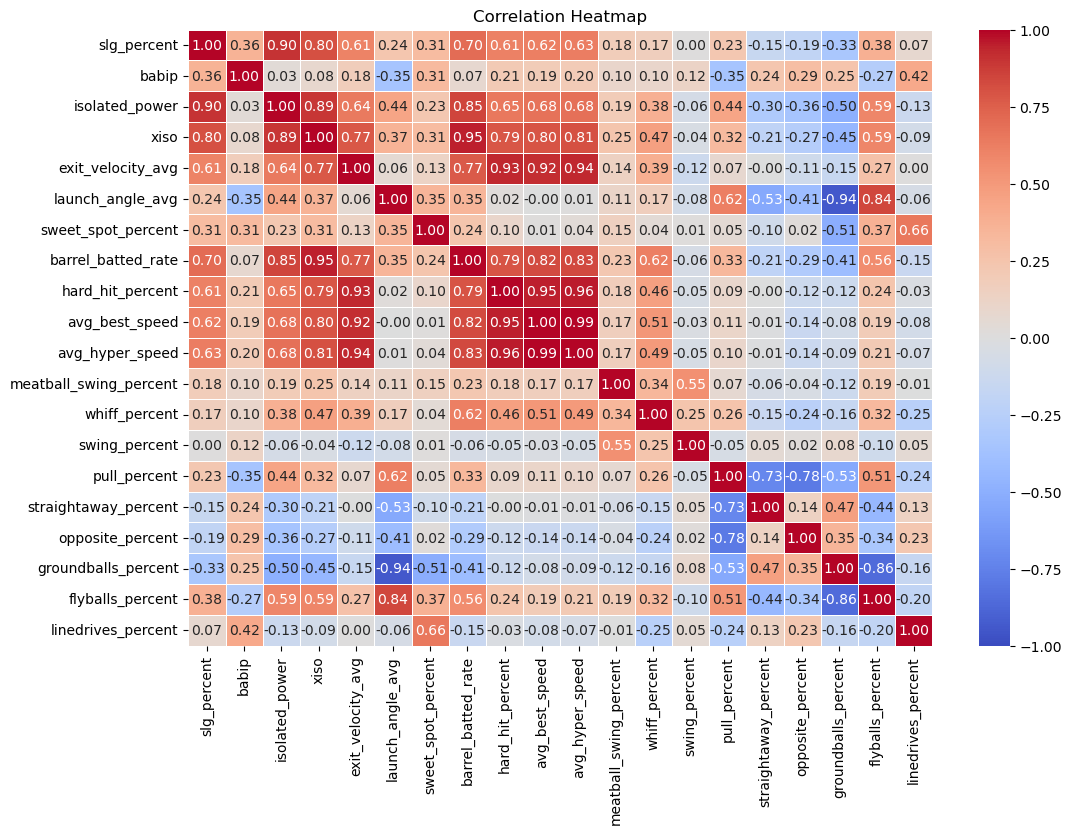

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Scaling
# Define lists of proportion-based and numeric features
proportion_features = ["babip", "isolated_power", "xiso",  
                       "sweet_spot_percent", "barrel_batted_rate", "hard_hit_percent",
                       "meatball_swing_percent", "whiff_percent", "swing_percent",
                       "pull_percent", "straightaway_percent", "opposite_percent",
                       "groundballs_percent", "flyballs_percent", "linedrives_percent"]
numeric_features = selected_data.select_dtypes(include=[float, int]).columns.difference(['slg_percent'] + proportion_features)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler to proportion-based features
selected_data[proportion_features] = standard_scaler.fit_transform(selected_data[proportion_features])

# Apply MinMaxScaler to numeric features, ensuring only numeric columns are scaled
selected_data[numeric_features] = minmax_scaler.fit_transform(selected_data[numeric_features])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10684\1469466994.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[proportion_features] = standard_scaler.fit_transform(selected_data[proportion_features])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10684\1469466994.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[numeric_features] = minmax_scaler.fit_transform(selected_data[numeric_features])


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 'slg_percent'를 기준으로 이진 분류 타겟 생성 (중앙값 기준)
slg_median = selected_data['slg_percent'].median()
selected_data['high_slg'] = (selected_data['slg_percent'] > slg_median).astype(int)

# 특성과 타겟 분리
X = selected_data.drop(['slg_percent', 'high_slg'], axis=1)
y = selected_data['high_slg']

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 (L2 정규화)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# 교차 검증을 통한 성능 평가
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Cross-validation Accuracy Scores: [0.94642857 0.97767857 0.95535714 0.95515695 0.95515695]
Mean Accuracy: 0.9579556374119154
Accuracy: 0.9776785714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.97      0.99      0.98       116

    accuracy                           0.98       224
   macro avg       0.98      0.98      0.98       224
weighted avg       0.98      0.98      0.98       224



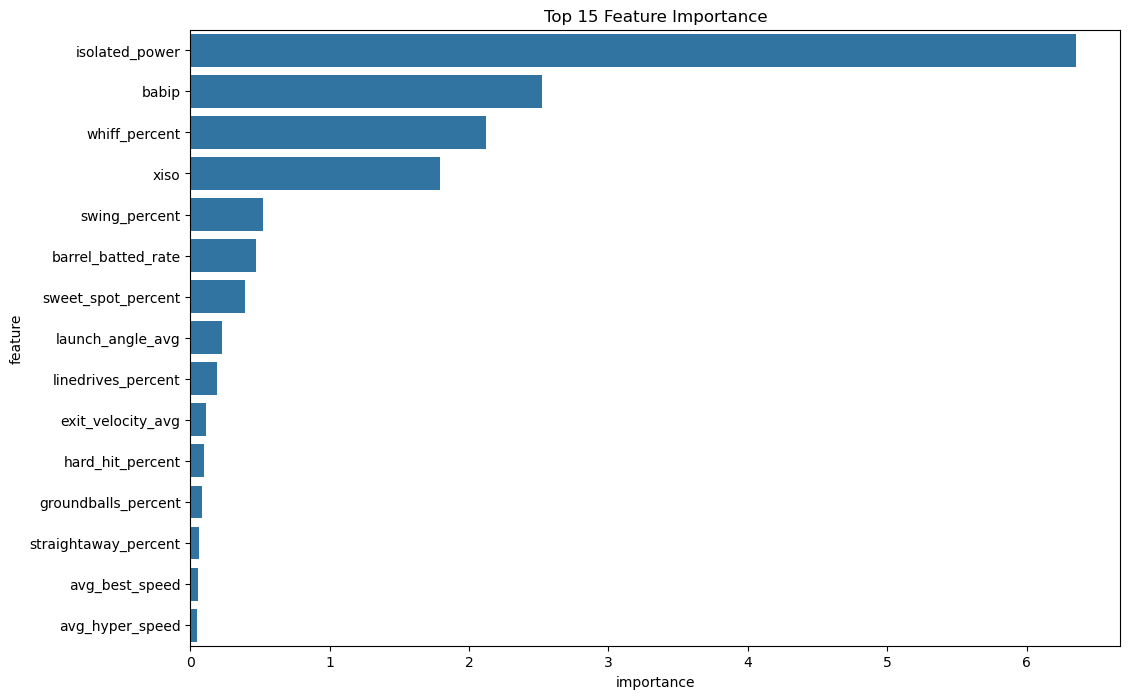

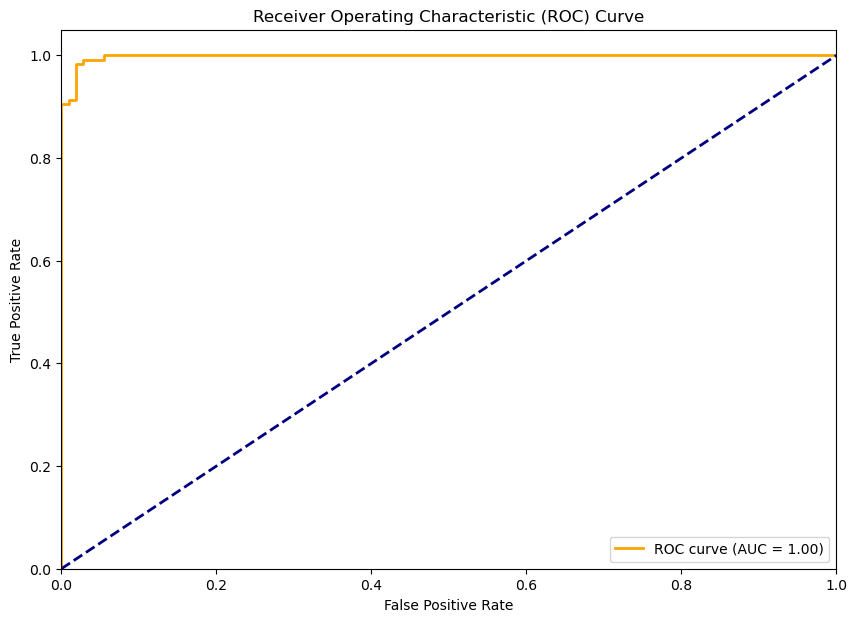

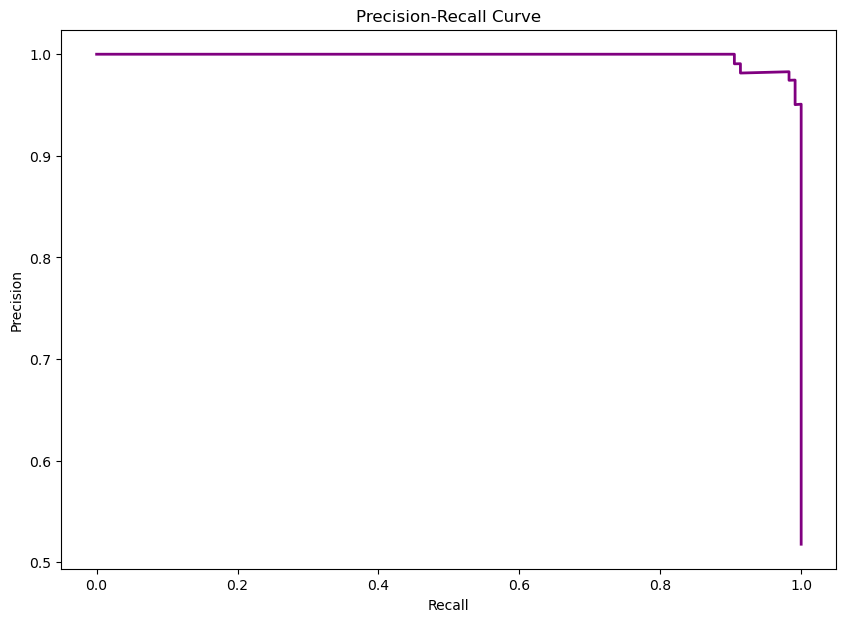

In [26]:

from sklearn.metrics import precision_recall_curve 

# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance')
plt.show()

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [24]:
# Calculate the proportion of each feature's importance relative to the total importance
feature_importance['importance_ratio'] = feature_importance['importance'] / feature_importance['importance'].sum()

# Display the updated feature importance with ratios in percentage format
feature_importance['importance_ratio'] = feature_importance['importance_ratio'] * 100  # Convert to percentage

print(feature_importance.head(15))

                 feature  importance  importance_ratio
1         isolated_power    6.355835         41.876064
0                  babip    2.523881         16.628844
11         whiff_percent    2.120659         13.972179
2                   xiso    1.789066         11.787445
12         swing_percent    0.523301          3.447824
6     barrel_batted_rate    0.472672          3.114247
5     sweet_spot_percent    0.390957          2.575859
4       launch_angle_avg    0.226705          1.493671
18    linedrives_percent    0.190837          1.257352
3      exit_velocity_avg    0.108942          0.717779
7       hard_hit_percent    0.099659          0.656612
16   groundballs_percent    0.085644          0.564271
14  straightaway_percent    0.058299          0.384108
8         avg_best_speed    0.054500          0.359079
9        avg_hyper_speed    0.050466          0.332499
